# Convolutional Neural Networks

###  **DSBA 6165: AI & Deep Learning**


## Goal

The goal of this lab activity is practicing to build a convolutional neural network class. For this, we break down each component of a CNN before building the complete network. We use CIFAR-10 dataset that contains 10 classes of images.

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling.

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

TF version: 2.18.0


## Loading Data

### CIFAR-10


[The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:
<table>
    <tr>
        <td class="cifar-class-name">airplane</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">automobile</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">bird</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">cat</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">deer</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">dog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">frog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">horse</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">ship</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">truck</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck10.png" class="cifar-sample" /></td>
    </tr>
</table>

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

**Reference**

This tech report (Chapter 3) describes the dataset and the methodology followed when collecting it in much greater detail. Please cite it if you intend to use this dataset.
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

[cifar10](https://www.tensorflow.org/datasets/catalog/cifar10)

### TODO1
1.Load the `datasets.cifar10` dataset using the `load_data()` method. Unpack the data into two pairs of arrays (x train,y train) for the training set and (x test,y test) for the test set.

In [40]:
# TODO: load data
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [41]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

First image has label index 6, which is a frog


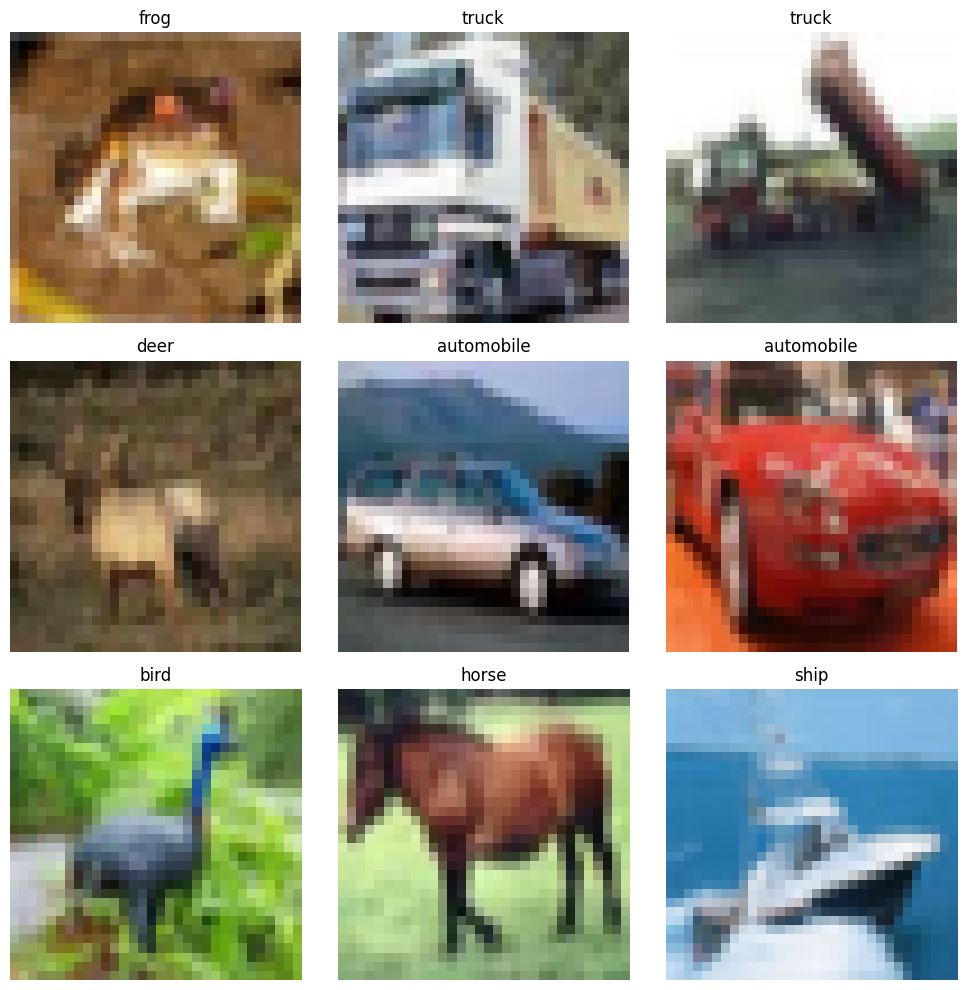

In [42]:
print(f"First image has label index {y_train[0][0]}, which is a {class_labels[y_train[0][0]]}")
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_labels[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

### TODO 1.1
1. Check shapes of x_train , x_test and y_test
  * Hint:To get the dimensions of data, we use the `shape` method in Python

In [43]:
#TODO:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


In [44]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

Most image pixel values range from zero to 255. We can simply transform the value range [0, 255] to [0, 1] by dividing the pixel values by 255. This is a common preprocessing step to normalize the pixel values of a image. Input range between 0 and 1 helps the network to converge faster and improve the performance. Furthermore, high-intensity pixels (200~255), brighter pixels, in the image often have strong influence on the model prediction, thus scaling it down makes training more stable.
Let us try this first.  


### TODO 1.2
1. Normalize the pixel values in the x train and x test to [0,1]

In [45]:
# TODO: normalize pixel values to [0,1]
x_train, x_test = x_train/255, x_test/255
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## Visualize the data


### TODO 2
1. Determine the number of distinct values in the target variable(y_train).
    1. Hint: use `unique` function: [Link](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [46]:
# TODO: you code here
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Now let's see the image of a training sample using the following function `imshow` [(Reference_link)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). In matplotlib the "imshow" function is used to display the image

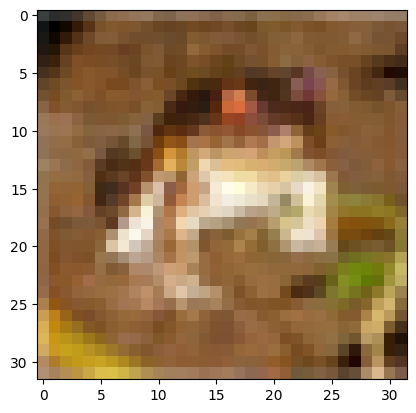

In [47]:
plt.imshow(x_train[0])

### TODO 2.1
1. Now our next goal is to create image plotting function which should take arguments as x , title and bot.
    1. The function should display the tensor (i.e your argument 'x') as an image using `imshow`.
    1. we have to remove the axis of images to remove we use the `xticks` and `yticks` methods, respectively. ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html))
    1. Now that we removed the axis our function should now label using `xlabel` and take argument as bot. ([Reference_link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html))
        


In [48]:
# TODO: create image plot function
def show_img(x, title="", bot=""):
    plt.imshow(x)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(bot)


Now that we have created a image plotting function above lets plot our images from "x_train" tensor
### TODO 2.2
1. using `figure` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)),create a Matplotlib figure with a specified size of (10, 5).
    1. write a for loop which take range of 10 values.
    2. using `subplot` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)) mention the number of rows your images should be displayed for example below output show 2 rows and 5 columns and another argument as i+1
    3. Lets use the `show_img` function we have created and give 3 arguments, 1st argument is every element of x_train and and the second is title of each image is set to the corresponding label from the `class_labels` list and the index of the label in "y_train".
    4. Exit the loop adjust the subplots to fit the figure size using `tight_layout` ([Reference_link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html)) function .


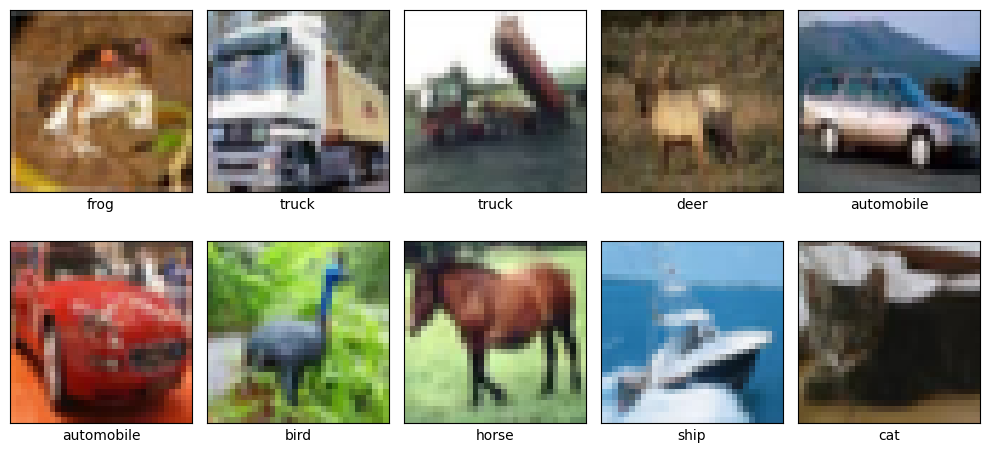

In [49]:
# TODO: plot first 10 images using subplot
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5, i+1)
    label_index = y_train[i][0]
    show_img(x_train[i],
    title=class_labels[label_index],
    bot=class_labels[label_index]
    )
plt.tight_layout()
plt.show()

## Convolution
A convolution is a linear operation that involves multiplying a set of weights with the input to yield a two-dimensional array of weights called a filter. If the filter is tuned to detect a specific type of feature in the input, then the repetitive use of that filter across the entire input image can discover that feature anywhere in the image.
[Refer to this link](https://www.nvidia.com/en-us/glossary/data-science/convolutional-neural-network/)


Here the values being assigned are the dimensions of x_train in the order batch_size, height, width, and channels.

In [50]:
batch_size, height, width, channels = x_train.shape

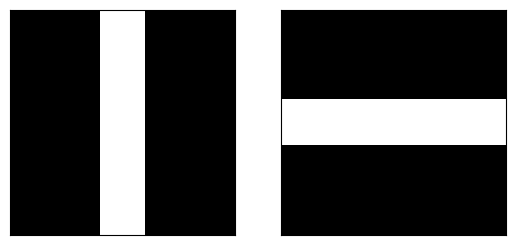

In [51]:
filters = np.zeros(shape=(5,5,channels,2))
filters[:, 2, :, 0] = 1
filters[2, :, :, 1] = 1

plt.subplot(1,2,1)
show_img(filters[:, :, :, 0])
plt.subplot(1,2,2)
show_img(filters[:, :, :, 1])

### TODO: 3
1. computes a 2-D convolution (`tf.nn.conv2d`) with the input argument x train(no of samples as 10) while maintaining the filters as filters, strides as "1", and padding as "SAME". [Reference_link](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)

In [52]:
# TODO: convolution
x_train_tensor = tf.convert_to_tensor(x_train[:10], dtype=tf.float32)
filters_tensor = tf.convert_to_tensor(filters, dtype=tf.float32)

out = tf.nn.conv2d(
    input=x_train_tensor,
    filters=filters_tensor,
    strides=1,
    padding='SAME'
)

In [53]:
out.shape

TensorShape([10, 32, 32, 2])

### TODO: 3.1
1. Using the `show_img` function which you have created above plot i'th input in `x_train`
2. using the `show_img` function and plot the i'th `out` which created above selecting 0th channel as 4th argument.
3. using the `show_img` function and plot the i'th `out` which created above selecting 1st channel as 4th argument.

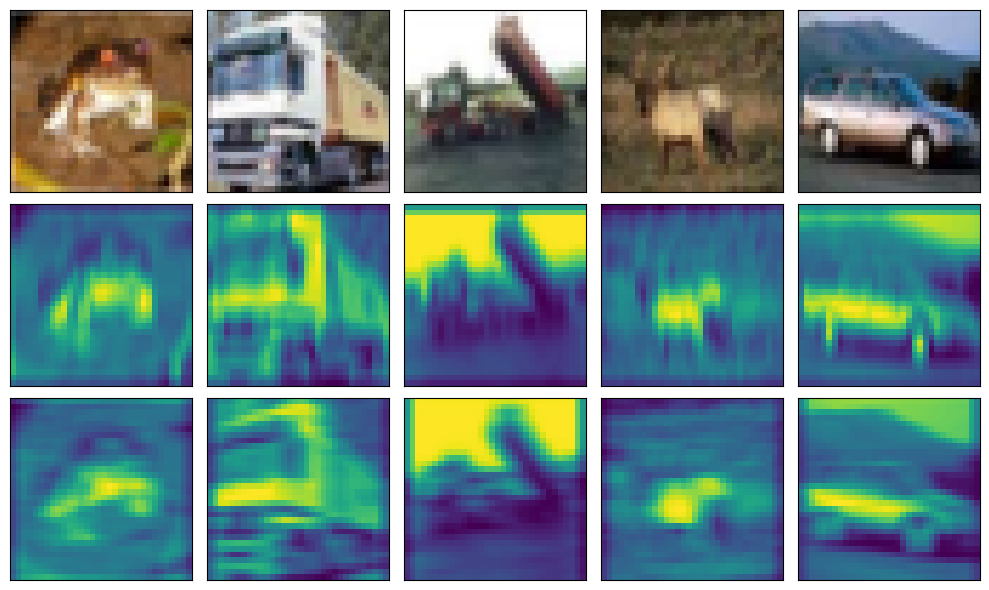

In [54]:
"""When using the convolution operation using tf.nn.conv2d, the output tensor out has 4 dimensions with shape:

Batch size (number of images, 5 in our)
Height (32, same as original image due to 'SAME' padding)
Width (32, same as original image due to 'SAME' padding)
Channels (2 filters we previously defined)

A specific element out[i, j, k, l]:

i selects which image in the batch
j selects which row in the image
k selects which column in the image
l selects which feature channel/filter output """

plt.figure(figsize=(10,6))
for i in range(5):
    plt.subplot(3, 5, i+1)
    # TODO
    show_img(x_train[i], title=class_labels[y_train[i][0]])

    plt.subplot(3, 5, i+6)
    # TODO
    show_img(out[i, :, :, 0], title="Horizontal Filter")

    plt.subplot(3, 5, i+11)
    # TODO
    show_img(out[i, :, :, 1], title='Vertical Filter')

plt.tight_layout()

### TODO: 3.2
1. Now our next goal is to create image plotting function(show_out) which should take arguments as x , and n_imgs.
    1. write a for loop which take range `n_imgs`.
    1. create a `subplot` with two figures in a row showing the output first image in `x` fro two channels respectively.

In [55]:
# TODO: plot output images
def show_out(x, n_imgs=2):
    plt.figure(figsize=(10,8) if n_imgs==2 else (10,6))
    for i in range(n_imgs):
        plt.subplot(n_imgs, 2, 2*i+1)
        plt.imshow(x[i, :, :, 0])
        plt.xticks([])
        plt.yticks([])

        plt.subplot(n_imgs, 2, 2*i+2)
        plt.imshow(x[i, :, :, 1])
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()

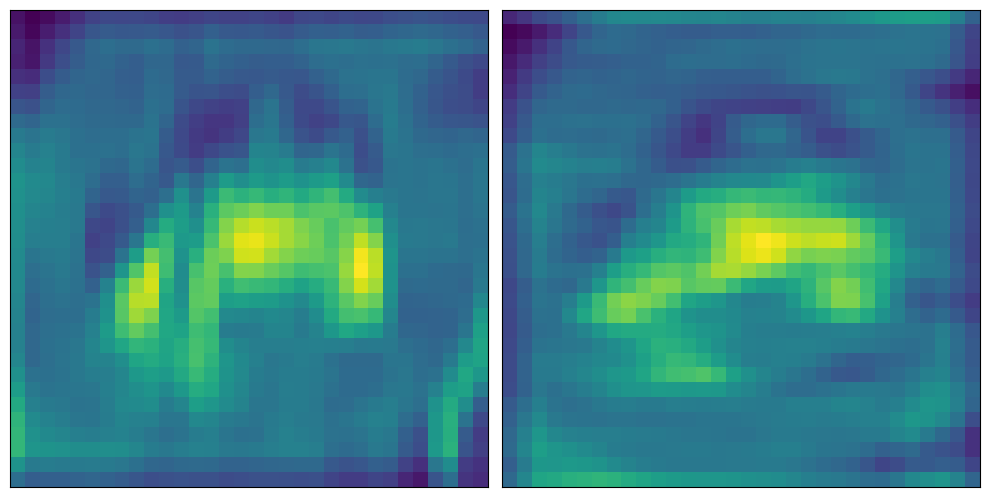

In [56]:
show_out(out, n_imgs=1)

### TODO: 3.3
1. Print out the shape of your `out`.

In [57]:
# TODO
out.shape

TensorShape([10, 32, 32, 2])

## Padding

The main benefits of padding are the following:
1. It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.
2. It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.
[Refer to this link for better understanding](https://medium.com/codex/why-padding-is-important-in-convolutional-neural-network-cnn-8cf7e9e38ca8)

### TODO: 4
1. Compute the conv2d feel free to use the `out`(convolution 2d) which you have created above but this time use padding as "VALID" padding ([Reference_link](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d)) and rest will remain same.


In [58]:
#TODO
out1 = tf.nn.conv2d(
    input=x_train_tensor,
    filters=filters_tensor,
    strides=1,
    padding='VALID'
)

### TODO: 4.1
1. Using `show_out` function which we have created above plot the `out1`.
1. Examine the shape of your `out1`

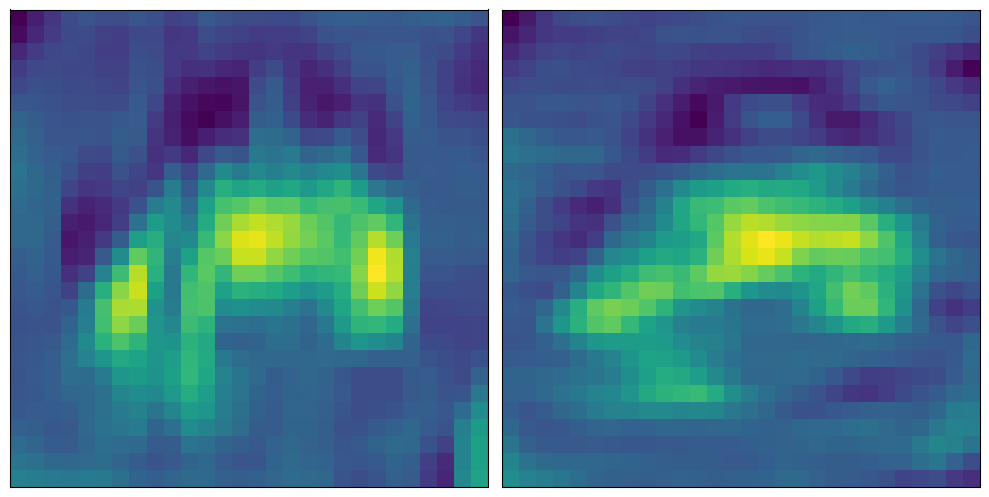

In [59]:
# TODO
show_out(out1, n_imgs=1)

In [60]:
# TODO
out1.shape

TensorShape([10, 28, 28, 2])

## Stride
Stride is the number of pixels shifts over the input matrix.

It is a component of convolutional neural networks, or neural networks tuned for the compression of images and video data. Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video. For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit,  at a time. The size of the filter affects the encoded output volume, so stride is often set to a whole integer, rather than a fraction or decimal. [Refer to this link for better understanding](https://deepai.org/machine-learning-glossary-and-terms/stride)


### TODO: 5
1. Referring to the previous TODO, but compute conv2d by giving `strides` as 2 and use `padding` as "SAME" padding and store it to `out2`.
2. Using `show_out`, plot the `out2`.
3. Examine the shape of your `out2`

TensorShape([10, 16, 16, 2])

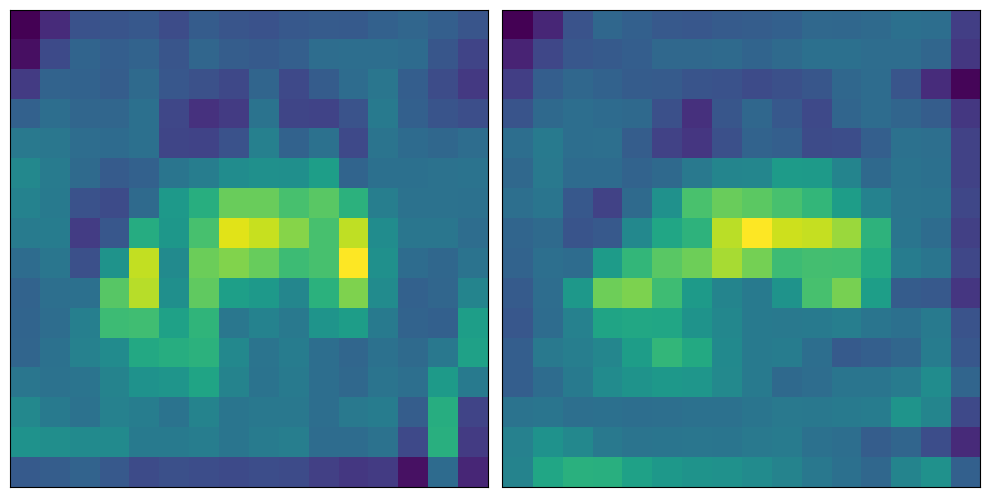

In [61]:
# TODO
out2 = tf.nn.conv2d(
    input=x_train_tensor,
    filters=filters_tensor,
    strides=2,
    padding='SAME'
)

show_out(out2, n_imgs=1)
out2.shape

### TODO: 5.1
1. Try conv2d with `strides` as 3 and store the output to `out3`.
2. Using `show_out` function, plot the `out3`.
3. Examine the shape of your `out3`.

TensorShape([10, 11, 11, 2])

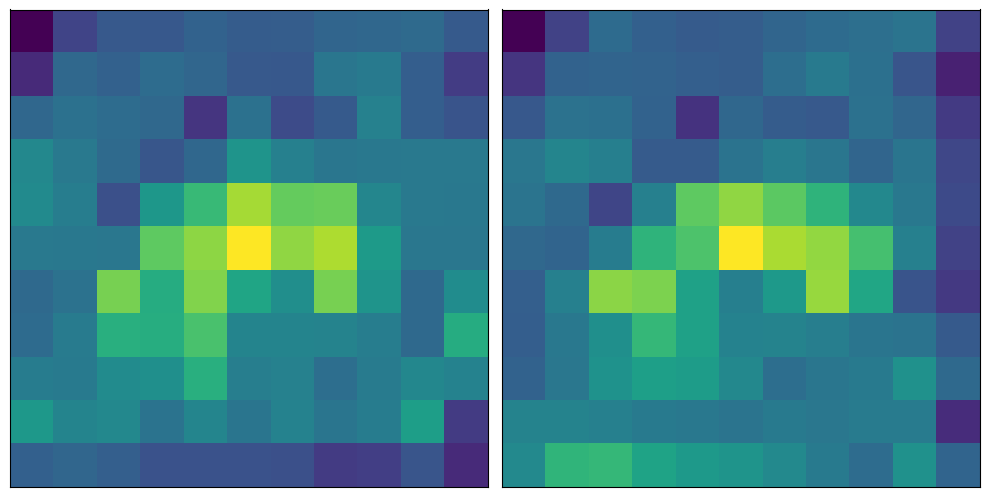

In [62]:
# TODO
out3 = tf.nn.conv2d(
    input=x_train_tensor,
    filters=filters_tensor,
    strides=3,
    padding='SAME'
)

show_out(out3, n_imgs=1)
out3.shape

## Pooling
A pooling layer is another building block of a CNN. Pooling Its function is to progressively reduce the spatial size of the representation to reduce the network complexity and computational cost.
[Refer to this link for better understanding](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/#:~:text=A%20pooling%20layer%20is%20a,Convolutional%20Layer)

1. There are two types of widely used pooling in CNN layer:
   1. Average Pooling

   2. Max Pooling
![1_vKn1L0Im3B9yFWCzhNOQSw.webp](attachment:1_vKn1L0Im3B9yFWCzhNOQSw.webp)

![1_Fa94PgzyQ6W_wRAQgmf3HQ.webp](attachment:1_Fa94PgzyQ6W_wRAQgmf3HQ.webp)

### TODO: 6
1. Using `keras.layers.MaxPool2D`, create an instance `max_pool` with `pool_size` 2.
1. Apply `max_pool` to first 10 training images in `x_train` to store the output to `out4`.
1. Using `show_out` to plot the max_pool output images.
  * HINT: pass 3 as the second argument to plot three images in a row.
1. Print out the shape of `out4`.  

TensorShape([10, 16, 16, 3])

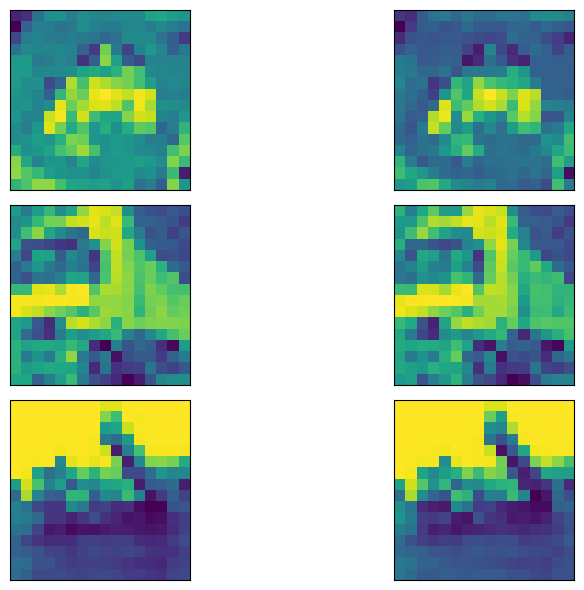

In [63]:
from tensorflow.keras.layers import MaxPool2D
x_train_tensor = tf.convert_to_tensor(x_train[:10], dtype=tf.float32)

max_pool = MaxPool2D(pool_size=2)

out4 = max_pool(x_train_tensor)
show_out(out4, n_imgs=3)
out4.shape


To compare the max pooling images with the input images we can plot the original images as below.

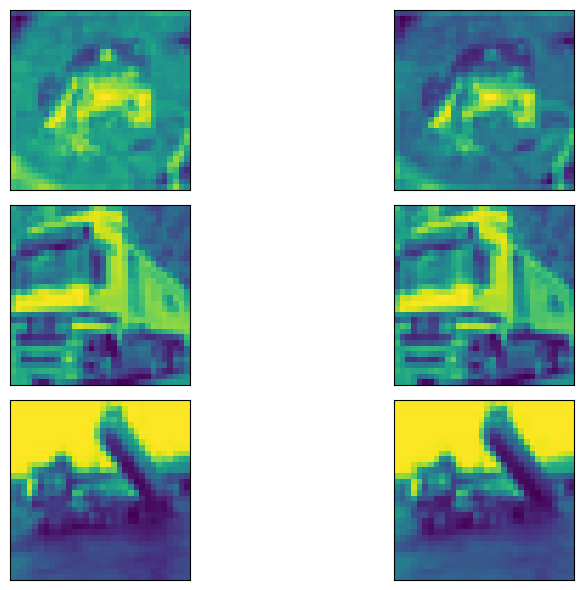

In [64]:
show_out(x_train_tensor,3)

## Convolutional Neural Networks
CNN were specifically designed to map image data to output variables. They’re particularly strong at developing internal representations of two-dimensional images that can be used to learn position and scale invariant structures. This makes them especially good at working with data that has a spatial relationship component.
The Basic Principle behind the working of CNN is the idea of Convolution, producing filtered Feature Maps stacked over each other.
A convolutional neural network consists of several layers.
1. Convolutional layers: perform mathematical operations on the input image to extract features.
1. Pooling layers: reduce the spatial dimensions of the image while retaining important features.
1. Fully connected layers: make the final prediction based on the features extracted by the convolutional and pooling layers.
[Reference link to learn more about cnn](https://cs231n.github.io/convolutional-networks/)


Now we are building a class for CNN model.

### TODO 7
1. Follow the image and create a CNN architecture
1. Complete the forward pass code.

Hint: We use `keras.layers.Conv2D` ([reference](https://keras.io/api/layers/convolution_layers/convolution2d/)) for this practice.

![](https://webpages.uncc.edu/mlee173/teach/ml/images/class/dsba6165-lab5-conv.png)

In [65]:
class CNN(keras.Model):
    """ Convolutional Neural Networks

        attributes
        ===========
        net     Sequential
                network built with keras.Sequential
    """

    def __init__(self):
        super().__init__()

        # TODO: build a neural network
        self.net = keras.Sequential([
            keras.Input(shape=(32,32,3)),
            keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(),
            keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
            keras.layers.MaxPooling2D(),
            keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(10)

        ])

        self.net.summary()


    def call(self, input):
        # TODO: forward pass
        x = self.net(input)
        return x


### TODO 7.1
1. Create a model using the CNN that was created above.
    1. Hint: No arguments are needed

In [66]:
# TODO: build a model
model = CNN()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### TODO 7.2
1. Using `compile`, prepare your model to have "Adam" as an `optimizer`, have a `loss` function to be "SparseCategoricalCrossentropy" also it should take argument as(from_logits=True) and `metrics` as "accuracy".

In [67]:
# TODO: compile with three metrics
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


### TODO 7.3
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for 10 epochs, and "validation_data" be a tuple of test dataset.

<font color='red' style='bold'>NOTE: this code runs for a long time. Be sure to run in colab or on GPU. </font>



In [68]:
# TODO: train
## ensure all data is converted to tensors
x_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int8) ## for the cifar dataset labels, int8 is more than sufficient
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int8)

history = model.fit(
    x_train_tensor, y_train_tensor,
    epochs=10,
    validation_data=(x_test_tensor, y_test_tensor)
)



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3601 - loss: 1.7271 - val_accuracy: 0.5579 - val_loss: 1.2413
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5772 - loss: 1.1906 - val_accuracy: 0.6314 - val_loss: 1.0685
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6404 - loss: 1.0200 - val_accuracy: 0.6442 - val_loss: 1.0172
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6774 - loss: 0.9177 - val_accuracy: 0.6765 - val_loss: 0.9260
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7033 - loss: 0.8413 - val_accuracy: 0.6747 - val_loss: 0.9460
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7323 - loss: 0.7630 - val_accuracy: 0.6956 - val_loss: 0.8809
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7502 - loss: 0.7129 - val_accuracy: 0.6809 - val_loss: 0.9493
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7696 - loss: 0.6659 - 


We have Created `plot_learning` function that plots the training and validation loss learning curve using the `history` argument.

In [69]:
def plot_learning(history, tgt='loss', val_tgt='val_loss', ylab='error'):
    plt.plot(history.history[tgt], label=tgt)
    plt.plot(history.history[val_tgt], label=val_tgt)
    plt.xlabel('Epoch')
    plt.ylabel(ylab)
    plt.legend()

### TODO 7.4
1.Plot the history using the `plot_learning`function which we created above.

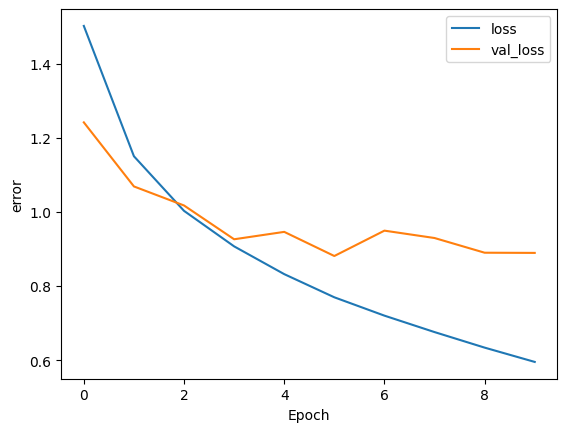

In [70]:
#TODO
plot_learning(history)


In [71]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### TODO 7.5
1.Using the `plot_learning` function plot the history but now give additional arguments such as 'accuracy', 'val_accuracy' and  'Accuracy'

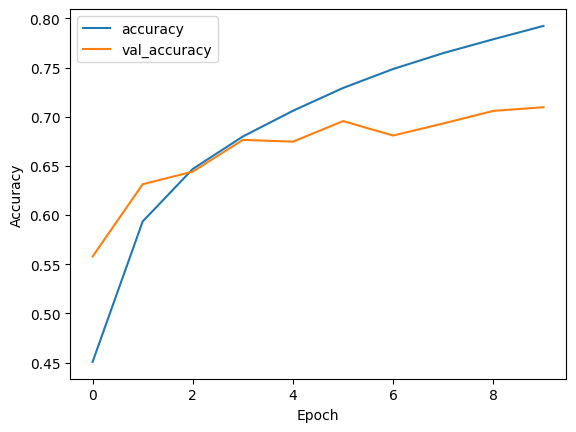

In [73]:
plot_learning(
    history,
    tgt='accuracy',
    val_tgt='val_accuracy',
    ylab='Accuracy'
)


### TODO 7.6
1. `evaluate` the model on test data (`x_test` and `y_test`).

In [74]:
# TODO:
model.evaluate(x_test_tensor, y_test_tensor)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7146 - loss: 0.8874


[0.8892642855644226, 0.7096999883651733]

In many cases, where the size of the array is too large, it takes too much time to find the maximum elements from them. For this purpose, the numpy module of Python provides a function called `numpy.argmax()`. This function returns indices of the maximum values are returned along with the specified axis.
### TODO 7.7
1. predict the model on test data (`x_test`) using `predict` function.
2. Pass the output of this function to the `np.argmax` function.

In [75]:
# TODO:
y_pred = model.predict(x_test_tensor)
np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3, 8, 8, ..., 5, 4, 7])

In [76]:
y_pred

array([[ -1.7882888 ,  -3.6947575 ,  -2.8424232 , ...,  -0.20760253,
         -0.7445229 ,  -2.1462073 ],
       [  3.822454  ,   8.428726  ,  -6.710485  , ...,  -8.521797  ,
         11.1788845 ,   2.2002835 ],
       [  1.5522585 ,   3.4244394 ,  -2.5493708 , ...,  -3.9891675 ,
          6.131425  ,   2.6334472 ],
       ...,
       [ -5.1642265 , -10.370188  ,   6.6086116 , ...,   2.0065494 ,
         -6.4194255 ,  -9.905365  ],
       [  0.82974505,   1.2305205 ,  -0.89386106, ...,  -3.315689  ,
         -3.7241592 ,  -6.242491  ],
       [ -3.4909377 ,  -9.948527  ,  -0.10650915, ...,  12.645534  ,
         -7.8789773 ,  -3.3659322 ]], dtype=float32)

### TODO 7.8
And finally lets plot the first 10 images of y_pred using subplot
1. Referring TODO 2.2, show the first 10 images with both labels and predictions.
  * HINT: `show_img` has `bot` and `title` arguments for you to use for predictions and labels.

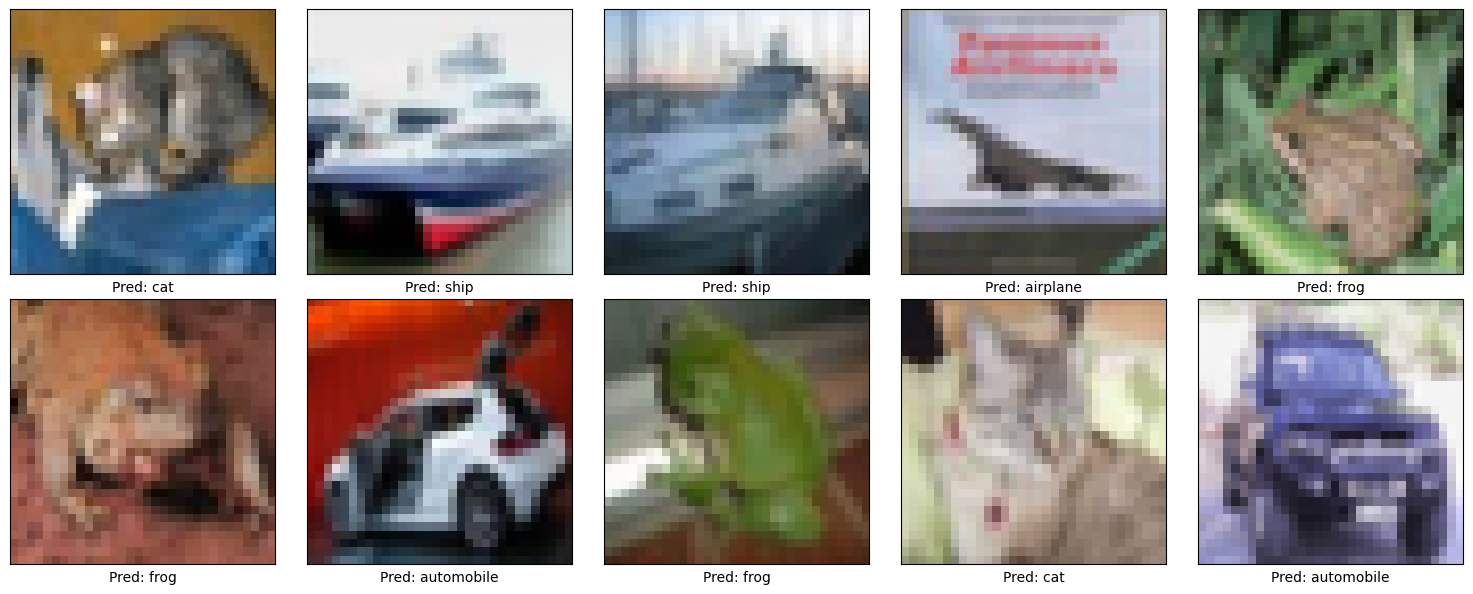

In [79]:
# TODO: plot first 10 images using subplot

y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 5, i+1)


    pred_text = f"Pred: {class_labels[y_pred_classes[i]]}"
    true_text = f"True: {class_labels[y_test[i][0]]}" if y_test.ndim > 1 else f"True: {class_labels[y_test[i]]}"

    show_img(x_test[i], bot=pred_text, title=true_text)

plt.tight_layout()
plt.show()



